In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# This function calculates the time to peak mag
def find_mintime(y_vals, x_vals): 
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index]

# This function finds the magnitude after 3 days
def find_tdm(x_interp, y_interp, tdm_time):
    good_yvals = np.array([])
    for i, yval in enumerate(y_interp):
        if np.abs(x_interp[i] - tdm_time) < 0.05:
            good_yvals = np.append(good_yvals, yval)
    return np.average(good_yvals)

# This function includes the last non-detection before the first detection
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]

In [2]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1

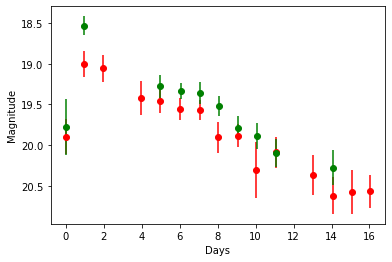

In [3]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 18.997744
3 days after minmag: 3.953113399911672
magnitude after 3 days: 19.417336681386555
fade after 3 days: 0.4196
minmag: 18.530201
3 days after minmag: 3.9785878998227417
magnitude after 3 days: 19.09128708277009
fade after 3 days: 0.5611


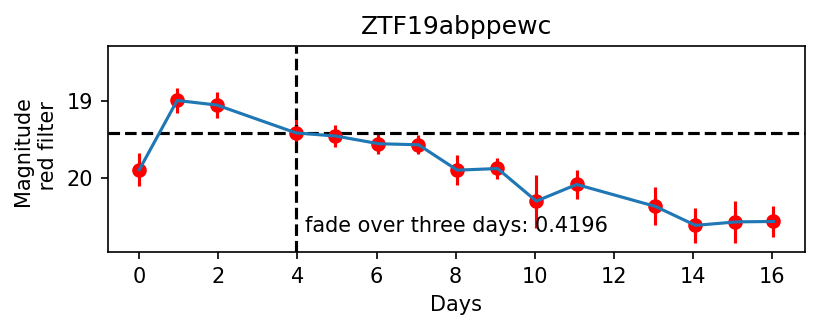

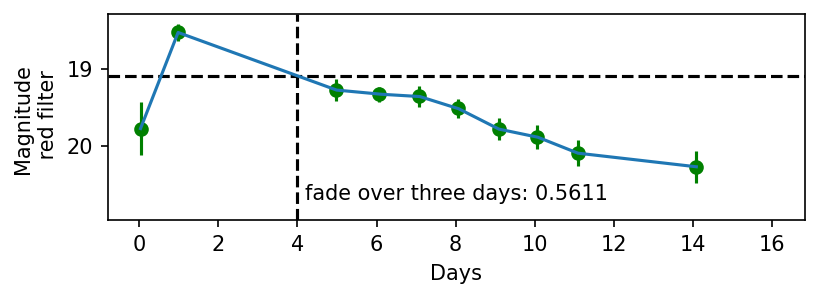

In [32]:
# red filter for CV 1

plotname = CV_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abppewc')



# green filter for CV 1
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [33]:
CV_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acswirx_20220606\\detections_ZTF18acswirx.csv")
plotname = CV_2

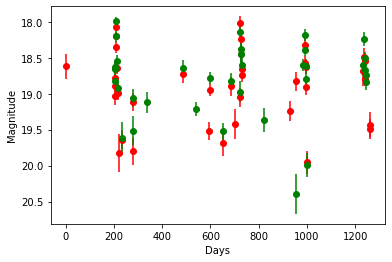

In [34]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 18.326502
3 days after minmag: 993.2053008996882
magnitude after 3 days: 18.571913949924657
fade after 3 days: 0.2454
minmag: 18.184113
3 days after minmag: 993.1432290999219
magnitude after 3 days: 18.39323300345589
fade after 3 days: 0.2091


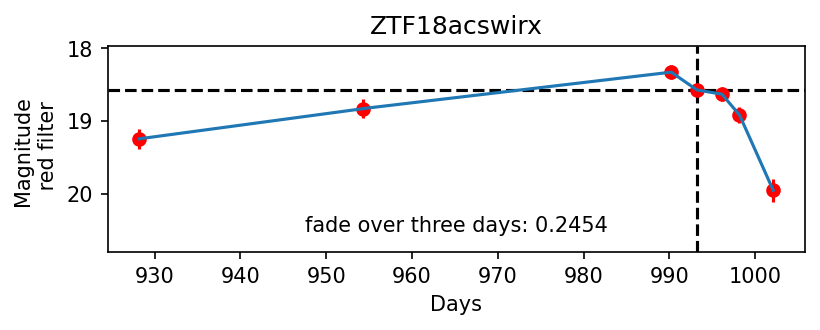

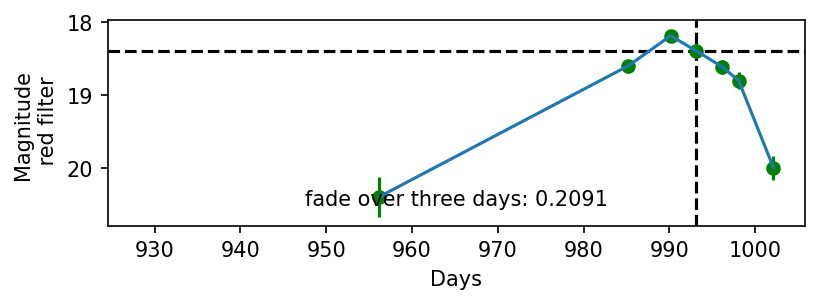

In [39]:
# red filter for CV 2

plotname = CV_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 25
finish = 32
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acswirx')



# green filter for CV 2
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 22
finish = 29
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [36]:
CV_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19aaqstxo_20220606\\detections_ZTF19aaqstxo.csv")
plotname = CV_3

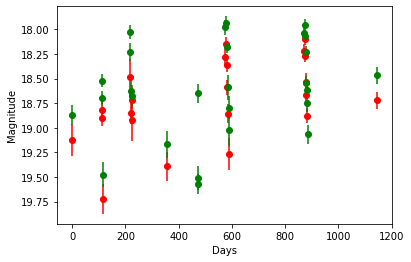

In [37]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 18.143967
3 days after minmag: 581.6610070001407
magnitude after 3 days: 18.472069527217634
fade after 3 days: 0.3281
minmag: 17.935453
3 days after minmag: 581.7305208998732
magnitude after 3 days: 18.25428267462643
fade after 3 days: 0.3188


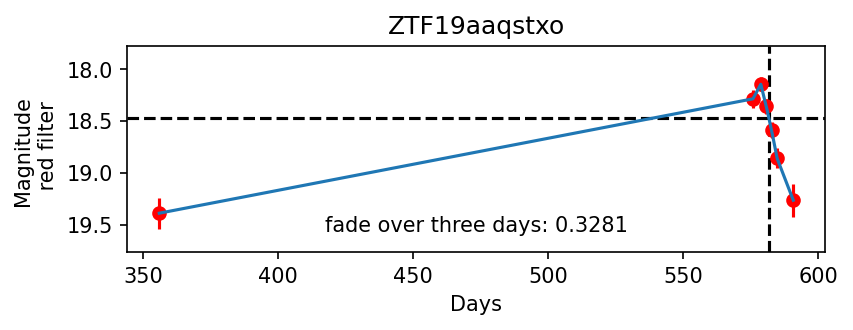

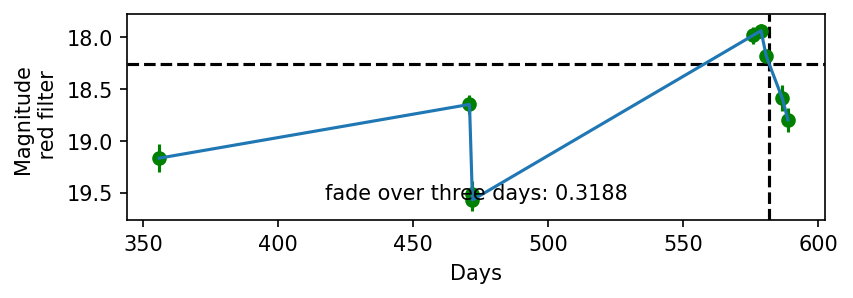

In [40]:
# red filter for CV 3

plotname = CV_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 8
finish = 15
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19aaqstxo')



# green filter for CV 3
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 8
finish = 17
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [41]:
CV_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abzcokk_20220606\\detections_ZTF20abzcokk.csv")
plotname = CV_4

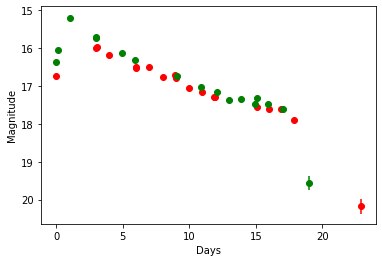

In [42]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 15.974818
3 days after minmag: 6.041562499951397
magnitude after 3 days: 16.491229065572465
fade after 3 days: 0.5164
minmag: 15.189616
3 days after minmag: 4.007430600002408
magnitude after 3 days: 15.928752329089725
fade after 3 days: 0.7391


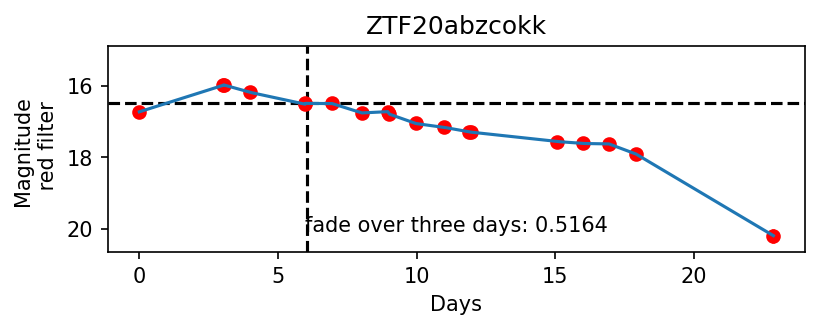

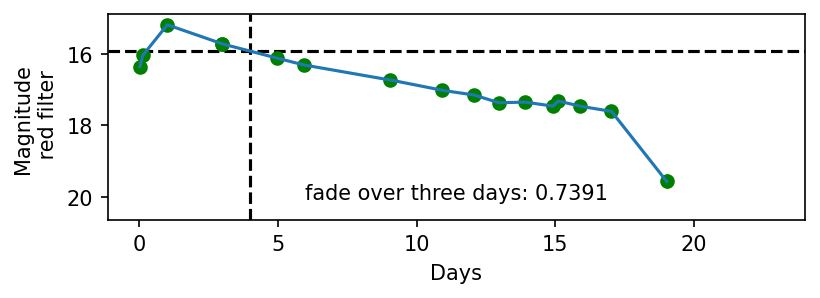

In [43]:
# red filter for CV 4

plotname = CV_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abzcokk')



# green filter for CV 4
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [44]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5

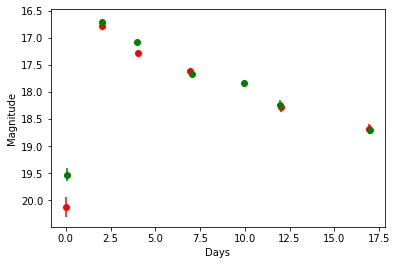

In [45]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.780235
3 days after minmag: 5.003240700345486
magnitude after 3 days: 17.390761293549794
fade after 3 days: 0.6105
minmag: 16.698427
3 days after minmag: 5.035879600327462
magnitude after 3 days: 17.28163983073031
fade after 3 days: 0.5832


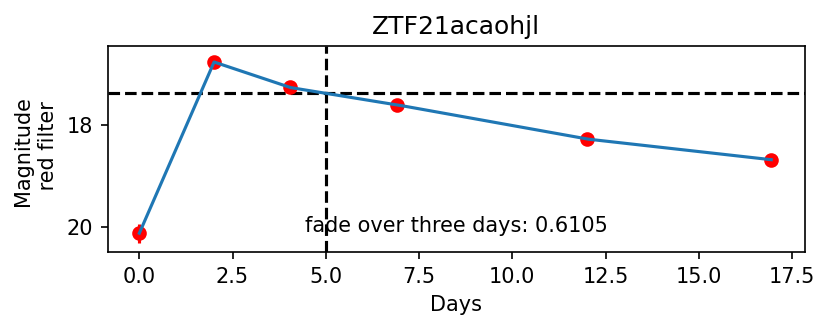

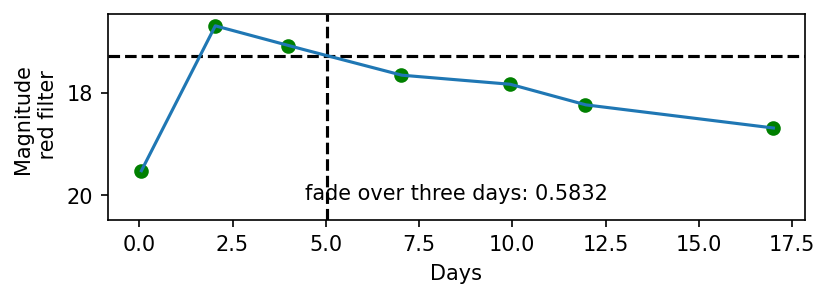

In [46]:
# red filter for CV 5

plotname = CV_5

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acaohjl')



# green filter for CV 5
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [47]:
CV_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abbxnbm_20220606\\detections_ZTF21abbxnbm.csv")
plotname = CV_6

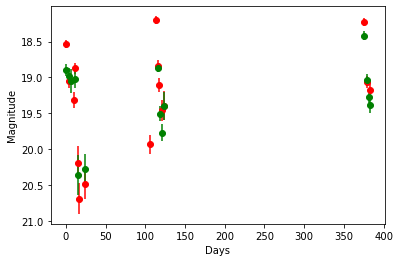

In [48]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 18.229588
3 days after minmag: 377.9714583000168
magnitude after 3 days: 18.847234115170696
fade after 3 days: 0.6176
minmag: 18.416746
3 days after minmag: 378.0193286999129
magnitude after 3 days: 18.883783199942886
fade after 3 days: 0.467


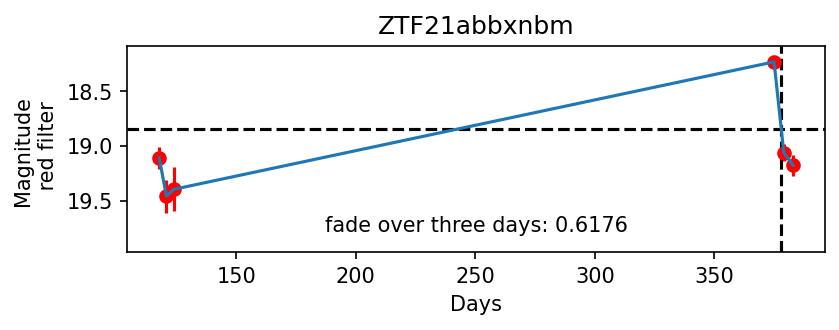

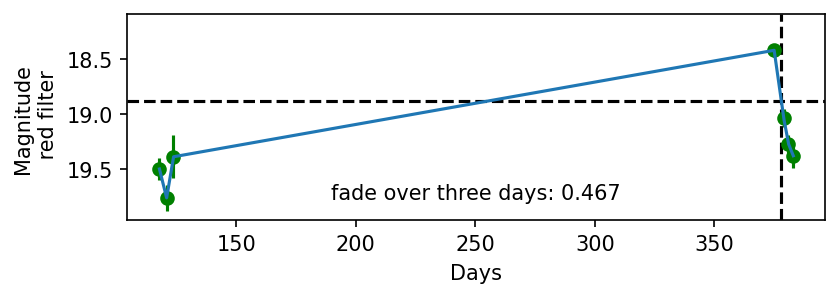

In [49]:
# red filter for CV 6

plotname = CV_6

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 10
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abbxnbm')



# green filter for CV 6
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 7
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [50]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7

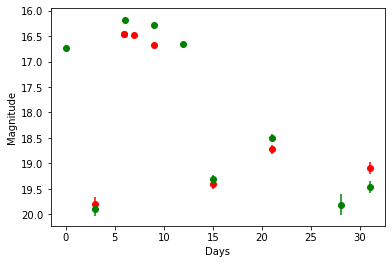

In [51]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.462772
3 days after minmag: 8.950914300039585
magnitude after 3 days: 16.666100734661896
fade after 3 days: 0.2033
minmag: 16.182114
3 days after minmag: 9.039050899904396
magnitude after 3 days: 16.293522256634972
fade after 3 days: 0.1114


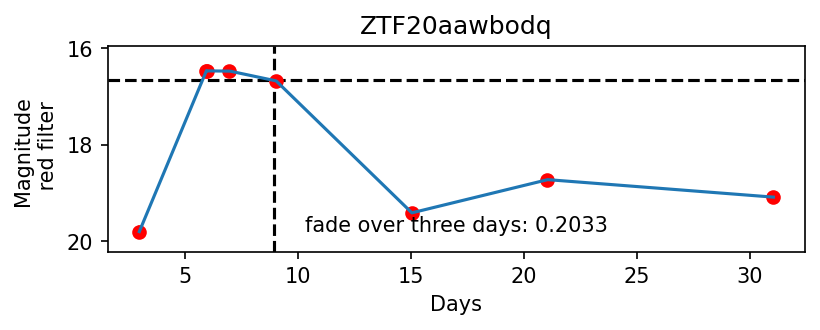

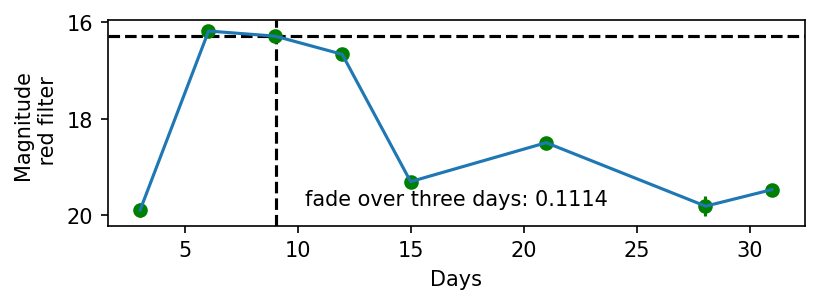

In [52]:
# red filter for CV 7

plotname = CV_7

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aawbodq')



# green filter for CV 7
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 1
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [53]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8

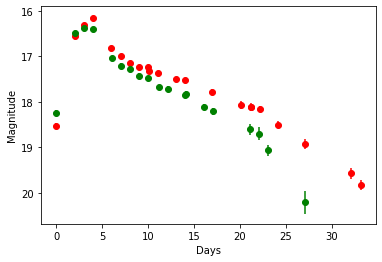

In [54]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.154366
3 days after minmag: 7.000219900161028
magnitude after 3 days: 16.997092706091323
fade after 3 days: 0.8427
minmag: 16.384924
3 days after minmag: 6.026689799968153
magnitude after 3 days: 17.035647694515717
fade after 3 days: 0.6507


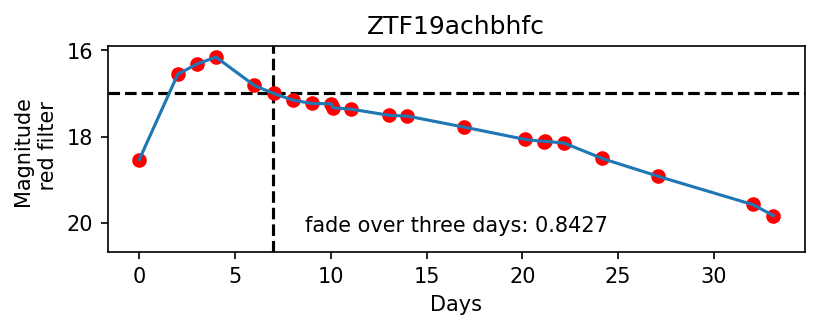

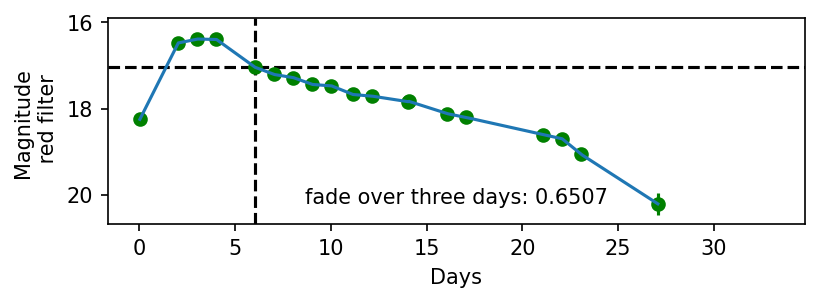

In [55]:
# red filter for CV 8

plotname = CV_8

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19achbhfc')



# green filter for CV 8
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [56]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9

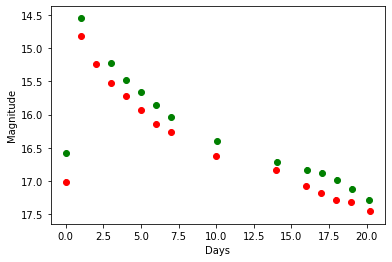

In [57]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 14.81506
3 days after minmag: 4.000787099823356
magnitude after 3 days: 15.723200677743808
fade after 3 days: 0.9081
minmag: 14.539643
3 days after minmag: 4.0291782999411225
magnitude after 3 days: 15.48245807254246
fade after 3 days: 0.9428


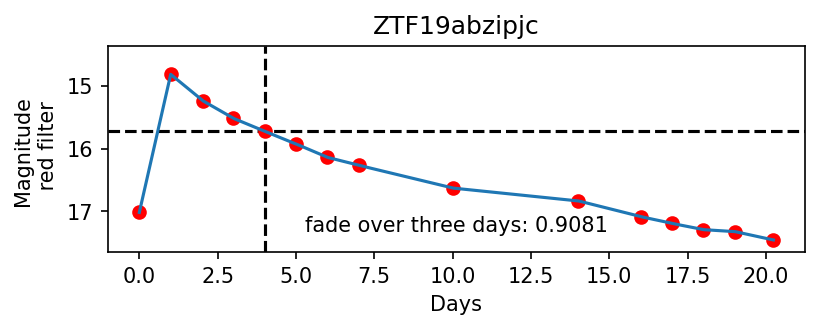

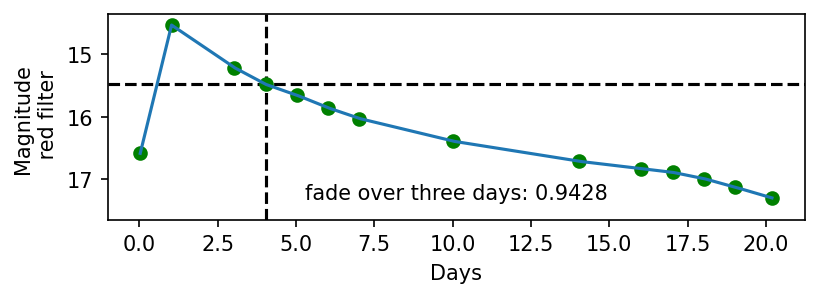

In [58]:
# red filter for CV 9

plotname = CV_9

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abzipjc')



# green filter for CV 9
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [59]:
CV_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abyrano_20220606\\detections_ZTF19abyrano.csv")
plotname = CV_10

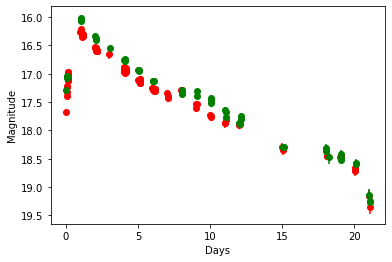

In [60]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.2125
3 days after minmag: 4.054282400291413
magnitude after 3 days: 16.92746346107655
fade after 3 days: 0.715
minmag: 16.007322
3 days after minmag: 4.033240800257772
magnitude after 3 days: 16.758292039281027
fade after 3 days: 0.751


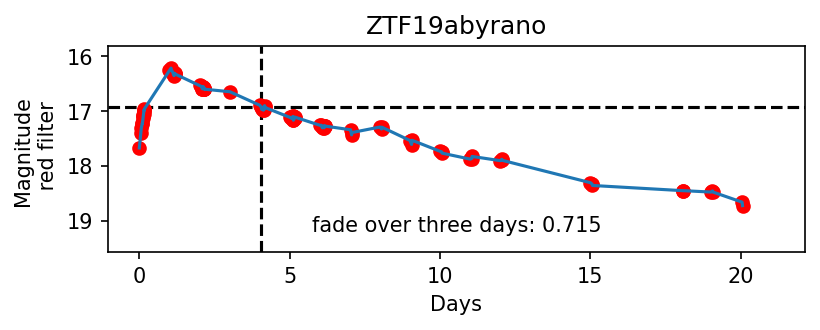

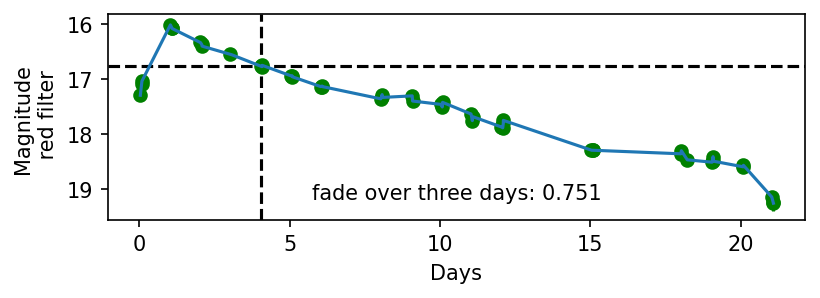

In [63]:
# red filter for CV 10

plotname = CV_10

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abyrano')



# green filter for CV 10
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [64]:
CV_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aahnvmo_20220616\\detections_ZTF22aahnvmo.csv")
plotname = CV_11

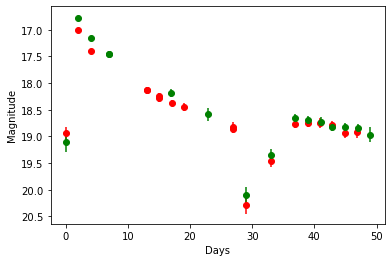

In [65]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 17.009974
3 days after minmag: 5.027326299808919
magnitude after 3 days: 17.475182672521754
fade after 3 days: 0.4652
minmag: 16.773073
3 days after minmag: 5.003032399807125
magnitude after 3 days: 17.260505601528134
fade after 3 days: 0.4874


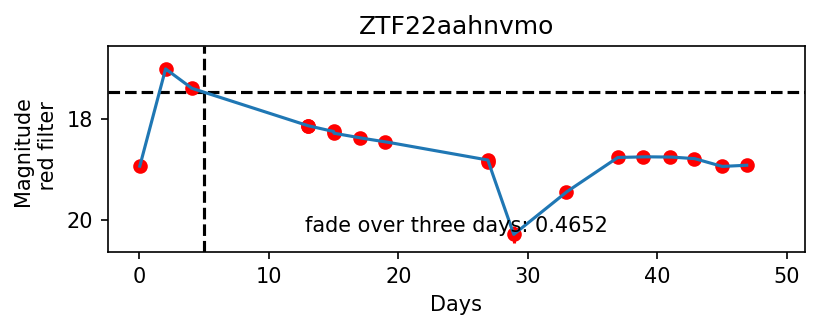

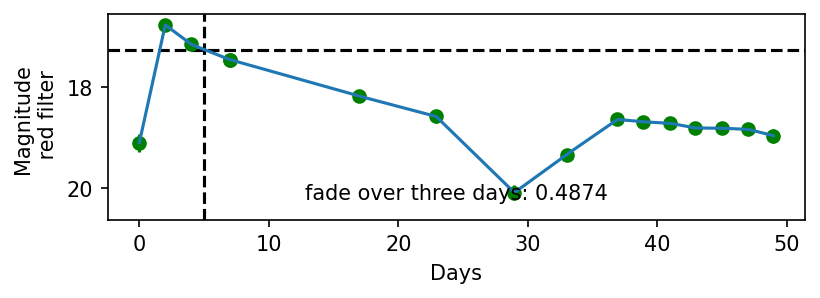

In [66]:
# red filter for CV 11

plotname = CV_11

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aahnvmo')



# green filter for CV 11
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [67]:
CV_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aakzsrj_20220616\\detections_ZTF22aakzsrj.csv")
plotname = CV_12

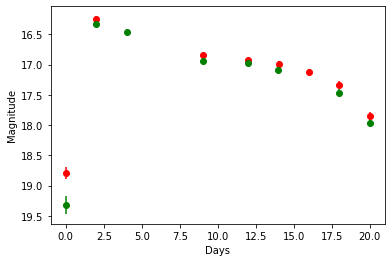

In [68]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.248594
3 days after minmag: 4.9860648000612855
magnitude after 3 days: 16.50248541347155
fade after 3 days: 0.2539
minmag: 16.3238
3 days after minmag: 5.007245299872011
magnitude after 3 days: 16.56308377364252
fade after 3 days: 0.2393


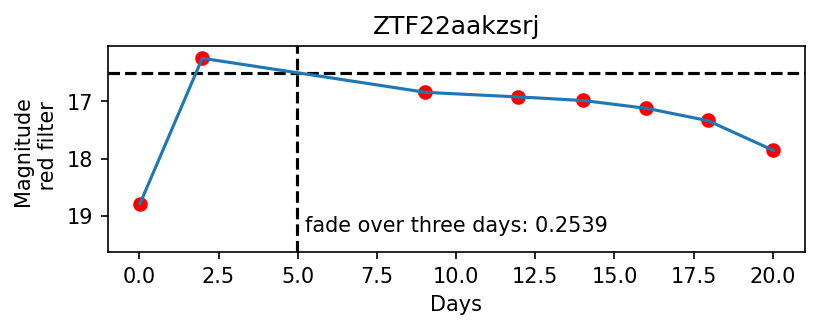

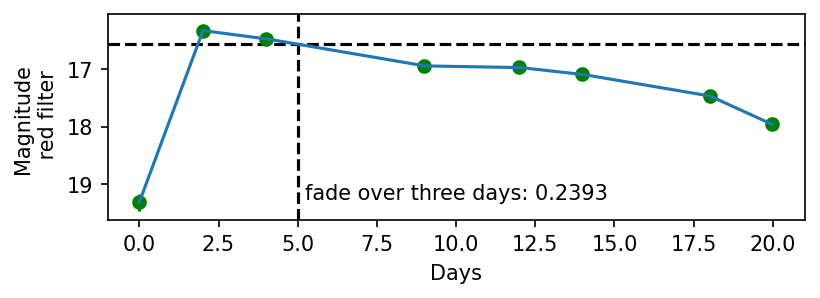

In [69]:
# red filter for CV 12

plotname = CV_12

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aakzsrj')



# green filter for CV 12
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [70]:
CV_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21accyuff_20220616\\detections_ZTF21accyuff.csv")
plotname = CV_13

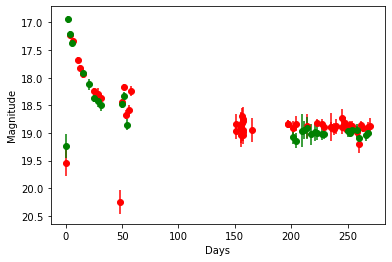

In [71]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 17.219593
3 days after minmag: 6.957951399963349
magnitude after 3 days: 17.40347625104608
fade after 3 days: 0.1839
minmag: 16.945642
3 days after minmag: 4.9758911998869735
magnitude after 3 days: 17.29687296892601
fade after 3 days: 0.3512


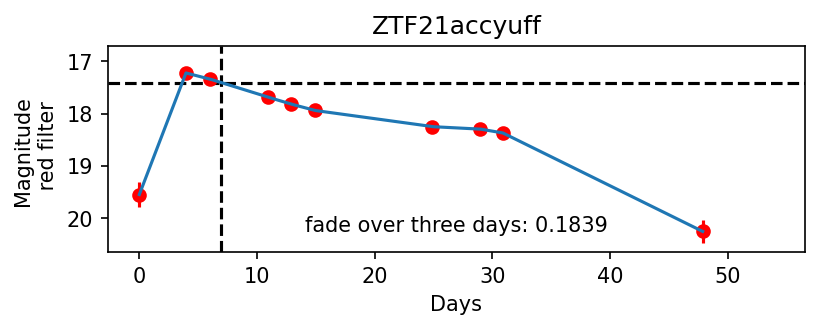

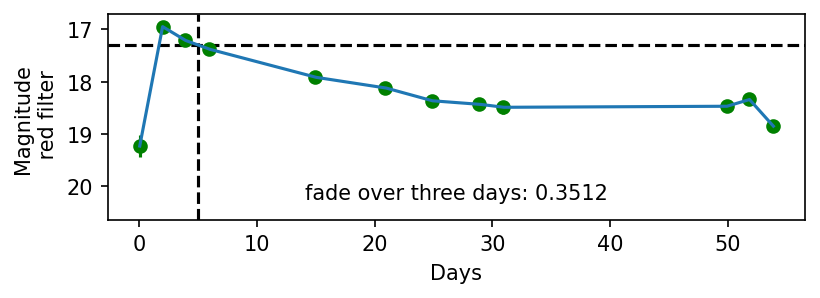

In [73]:
# red filter for CV 13

plotname = CV_13

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 10
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21accyuff')



# green filter for CV 13
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 12
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [74]:
CV_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazmjby_20220616\\detections_ZTF21aazmjby.csv")
plotname = CV_14

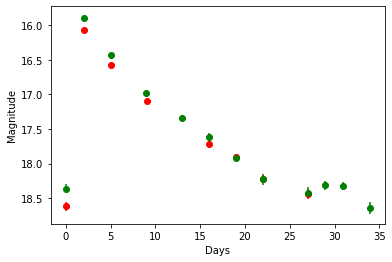

In [75]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.072609
3 days after minmag: 5.022580999873753
magnitude after 3 days: 16.567385474242602
fade after 3 days: 0.4948
minmag: 15.899458
3 days after minmag: 5.0443170997241396
magnitude after 3 days: 16.439710518256163
fade after 3 days: 0.5403


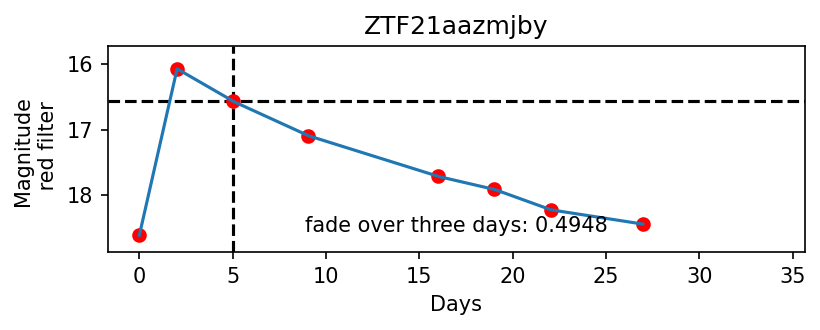

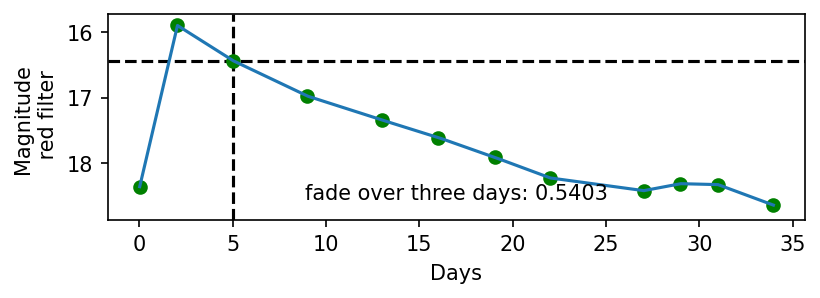

In [76]:
# red filter for CV 14

plotname = CV_14

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aazmjby')



# green filter for CV 14
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [77]:
CV_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18absnibc_20220616\\detections_ZTF18absnibc.csv")
plotname = CV_15

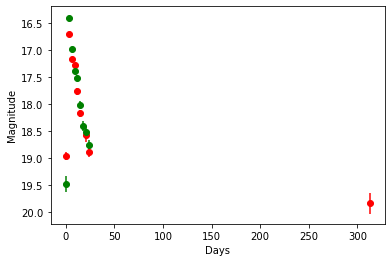

In [78]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.69992
3 days after minmag: 6.092719899956137
magnitude after 3 days: 17.164658026621478
fade after 3 days: 0.4647
minmag: 16.407034
3 days after minmag: 6.046157400116499
magnitude after 3 days: 16.978733225199658
fade after 3 days: 0.5717


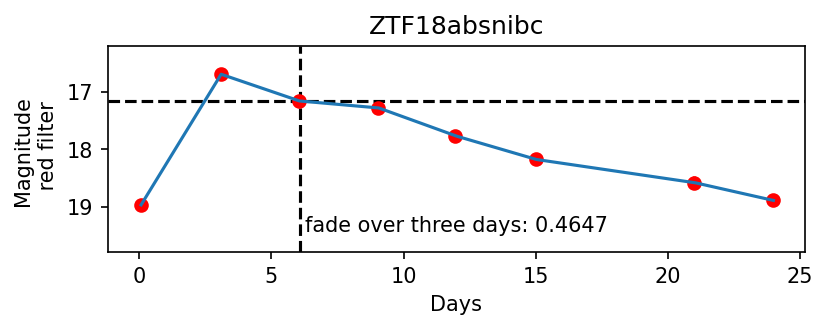

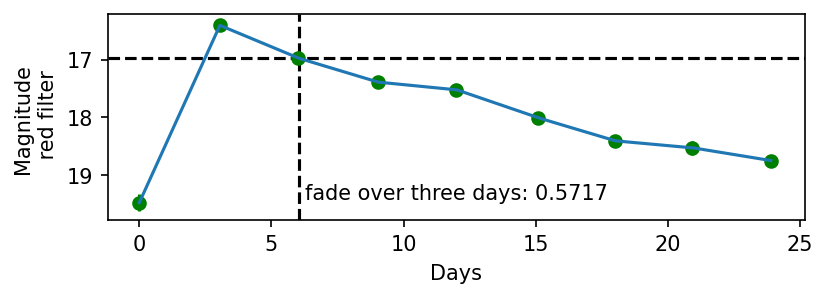

In [80]:
# red filter for CV 15

plotname = CV_15

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 8
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18absnibc')



# green filter for CV 15
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [81]:
CV_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_16
non_detection = ND_16

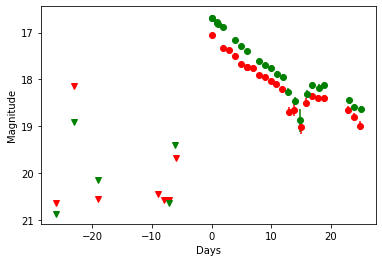

In [82]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 17.047907
3 days after minmag: 3.0
magnitude after 3 days: 17.387349651656343
fade after 3 days: 0.3394
minmag: 16.690971
3 days after minmag: 3.0199190001003444
magnitude after 3 days: 17.02846423106769
fade after 3 days: 0.3375


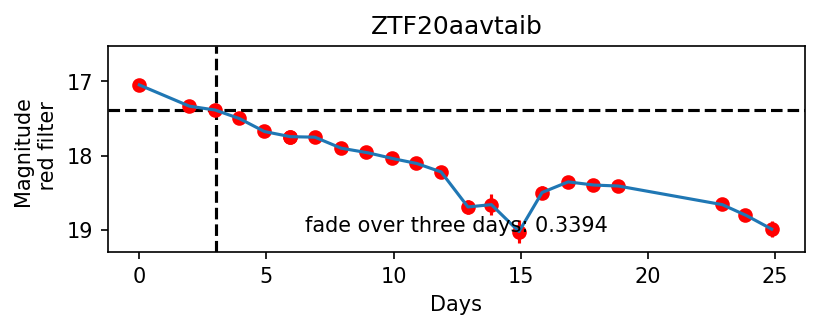

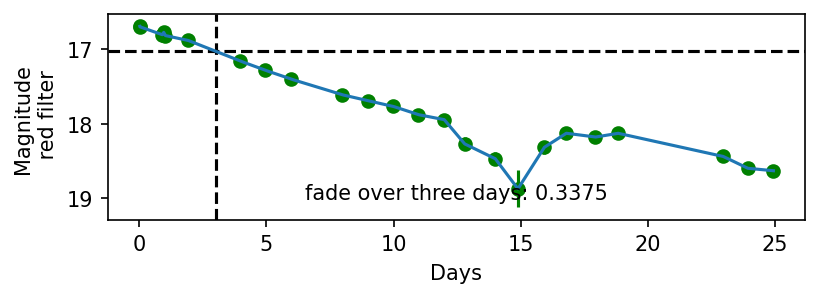

In [85]:
# red filter for CV 16

plotname = CV_16

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aavtaib')



# green filter for CV 16
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [86]:
CV_17 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acaktuk_20220616\\detections_ZTF18acaktuk.csv")
plotname = CV_17

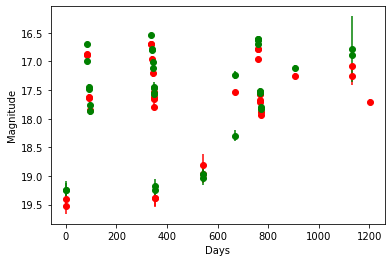

In [87]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.877876
3 days after minmag: 86.04702550033107
magnitude after 3 days: 17.2198556664869
fade after 3 days: 0.342
minmag: 16.694736
3 days after minmag: 86.10487270029262
magnitude after 3 days: 17.033440494201667
fade after 3 days: 0.3387


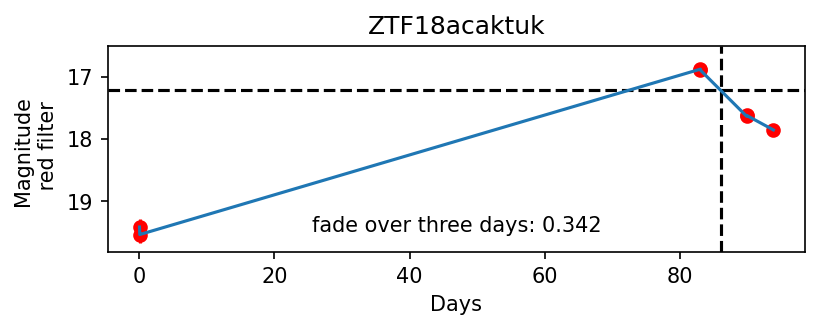

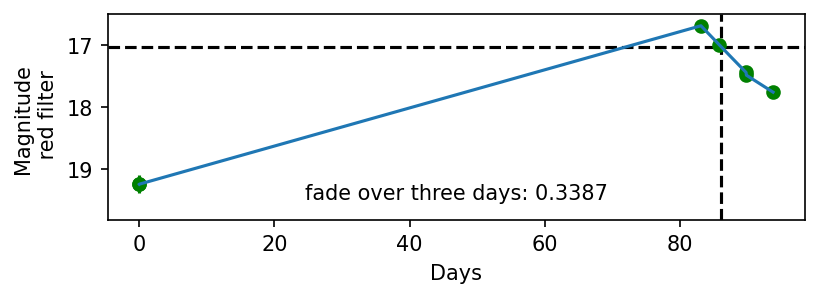

In [88]:
# red filter for CV 17

plotname = CV_17

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acaktuk')



# green filter for CV 17
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [89]:
CV_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_18
non_detection = ND_18

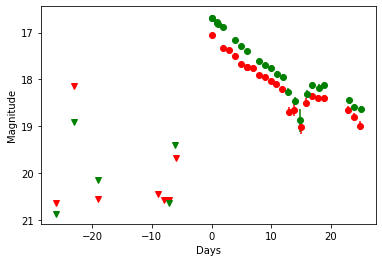

In [90]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 17.047907
3 days after minmag: 3.0
magnitude after 3 days: 17.387349651656343
fade after 3 days: 0.3394
minmag: 16.690971
3 days after minmag: 3.0199190001003444
magnitude after 3 days: 17.02846423106769
fade after 3 days: 0.3375


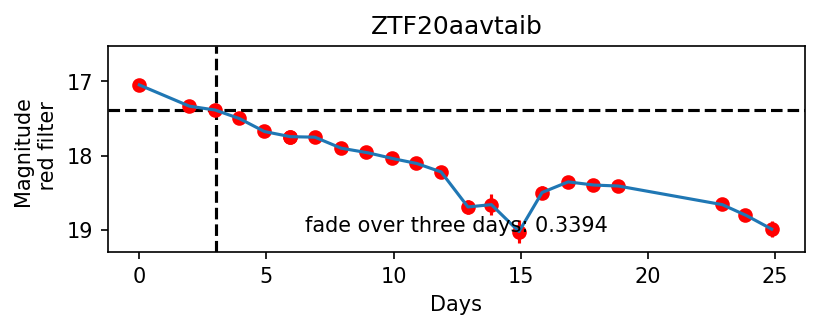

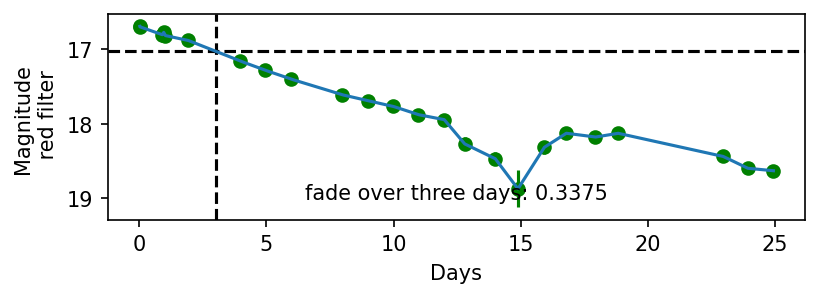

In [91]:
# red filter for CV 18

plotname = CV_18

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aavtaib')



# green filter for CV 18
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [92]:
CV_19= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\detections_ZTF21acgrero.csv")
ND_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\non_detections_ZTF21acgrero.csv")
plotname = CV_19
non_detection = ND_19

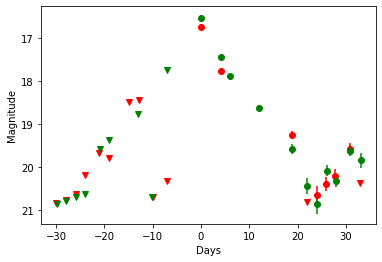

In [93]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 16.749512
3 days after minmag: 3.0
magnitude after 3 days: 17.50122381587918
fade after 3 days: 0.7517
minmag: 16.522879
3 days after minmag: 3.021597200073302
magnitude after 3 days: 17.202517503347032
fade after 3 days: 0.6796


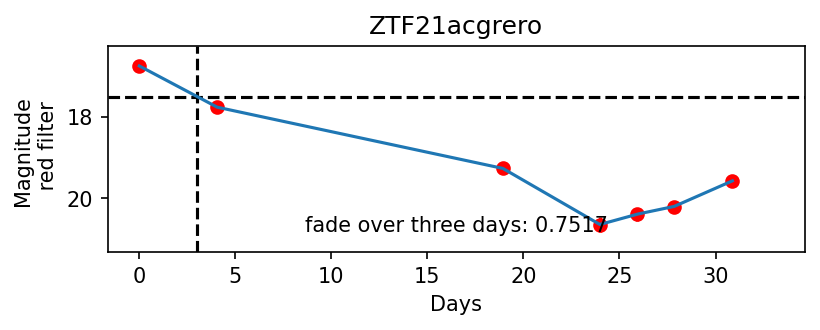

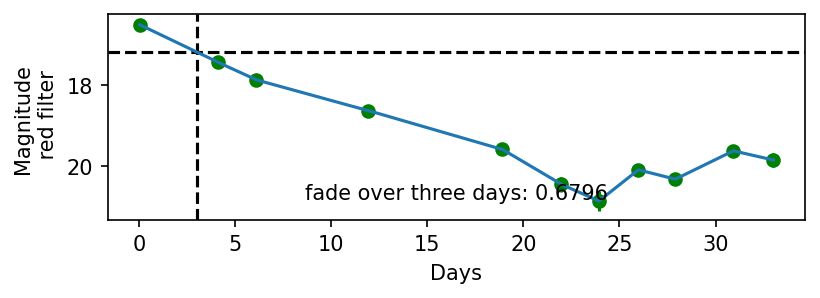

In [95]:
# red filter for CV 19

plotname = CV_19

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acgrero')



# green filter for CV 19
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [96]:
CV_20= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\detections_ZTF18abrxrms.csv")
ND_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\non_detections_ZTF18abrxrms.csv")
plotname = CV_20
non_detection = ND_20

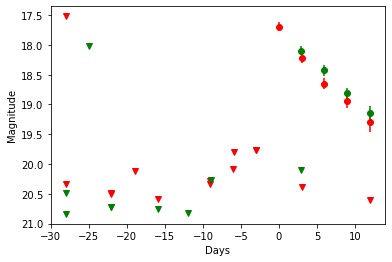

In [97]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 17.69212
3 days after minmag: 3.0
magnitude after 3 days: 18.231132327059512
fade after 3 days: 0.539
minmag: 18.09533
3 days after minmag: 5.920937499962747
magnitude after 3 days: 18.421590696785703
fade after 3 days: 0.3263


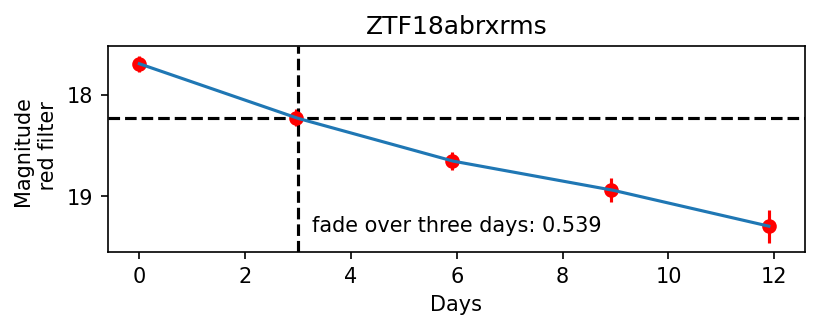

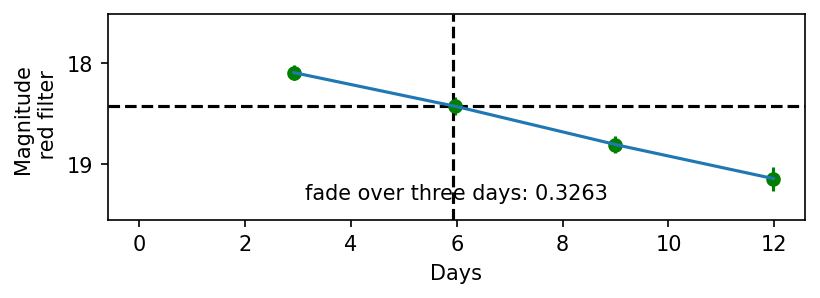

In [98]:
# red filter for CV 20

plotname = CV_20

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abrxrms')



# green filter for CV 20
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [107]:
abv_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla detections - Sheet1.csv")
abv_nd = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla non detections - Sheet1.csv")
plotname = abv_detections
non_detection = abv_nd

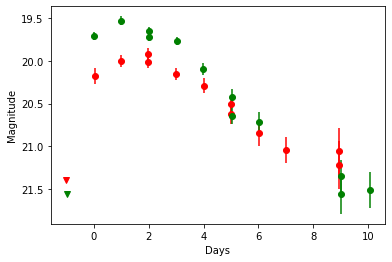

In [109]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

nd_red_points = non_detection['Filter']=='r'
nd_green_points = non_detection['Filter']=='g'
plt.errorbar(non_detection['Date'][nd_red_points]-plotname['Date'][0], non_detection['Mag'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['Date'][nd_green_points]-plotname['Date'][0], non_detection['Mag'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 19.92
3 days after minmag: 4.959999999999127
magnitude after 3 days: 20.517044827313196
fade after 3 days: 0.597
minmag: 19.53
3 days after minmag: 4.0
magnitude after 3 days: 20.111006833127764
fade after 3 days: 0.581


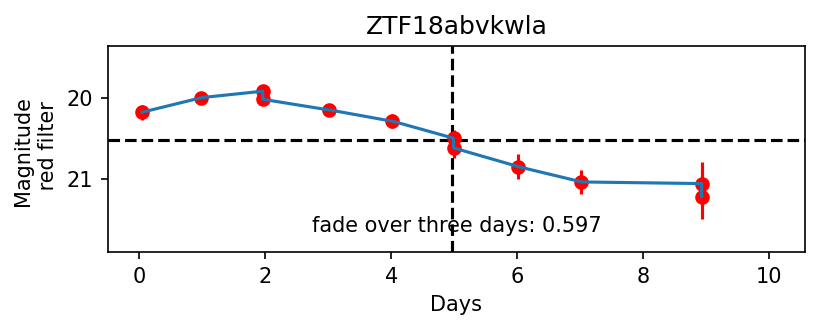

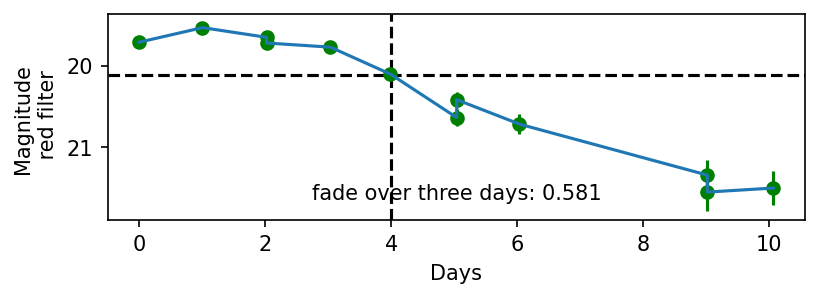

In [126]:
# red filter for transient 1

plotname = abv_detections
non_detection = abv_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
nd_y_vals = non_detection['Mag'][nd_red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abvkwla')



# green filter for transient 1
# This is the code for the second plot



plotname = abv_detections
non_detection = abv_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]

nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
nd_y_vals = non_detection['Mag'][nd_red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [113]:
abc_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo detections - Sheet1.csv")
abc_nd = pd.read_csv('C:\\Users\\marya\\Downloads\\ZTF18abcfcoo non detections - Sheet1.csv')
plotname = abc_detections
non_detection = abc_nd

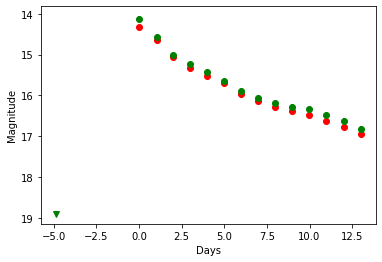

In [114]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

nd_red_points = non_detection['Filter']=='r'
nd_green_points = non_detection['Filter']=='g'
plt.errorbar(non_detection['Date'][nd_red_points]-plotname['Date'][0], non_detection['Mag'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['Date'][nd_green_points]-plotname['Date'][0], non_detection['Mag'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 14.32
3 days after minmag: 3.0
magnitude after 3 days: 15.31926167399515
fade after 3 days: 0.9993
minmag: 14.12
3 days after minmag: 3.0
magnitude after 3 days: 15.239636986871334
fade after 3 days: 1.1196


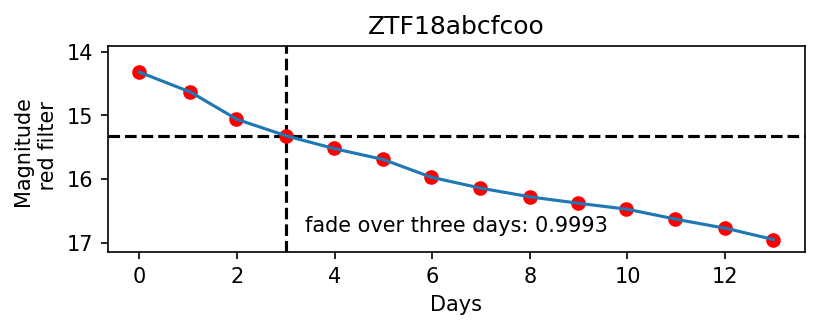

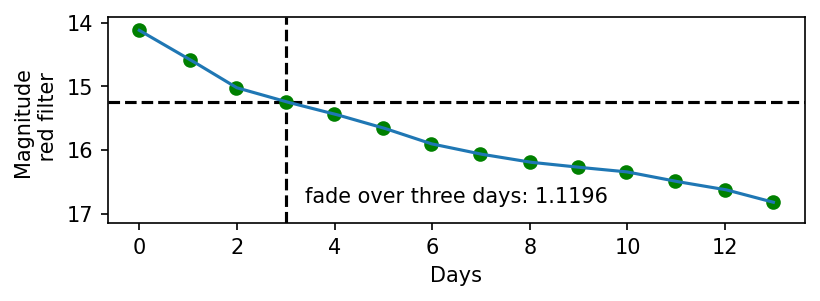

In [116]:
# red filter for transient 2

plotname = abc_detections
non_detection = abc_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abcfcoo')



# green filter for transient 2
# This is the code for the second plot



red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [117]:
aci_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel detections - Sheet1.csv")
plotname = aci_detections

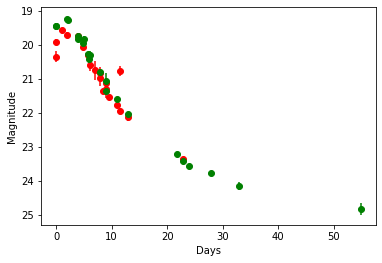

In [118]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 19.56
3 days after minmag: 4.097649999996065
magnitude after 3 days: 19.795812716555375
fade after 3 days: 0.2358
minmag: 19.23
3 days after minmag: 5.039059999995516
magnitude after 3 days: 19.83456486377186
fade after 3 days: 0.6046


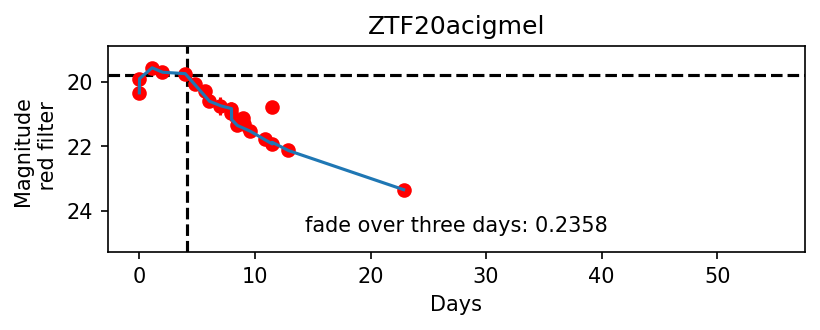

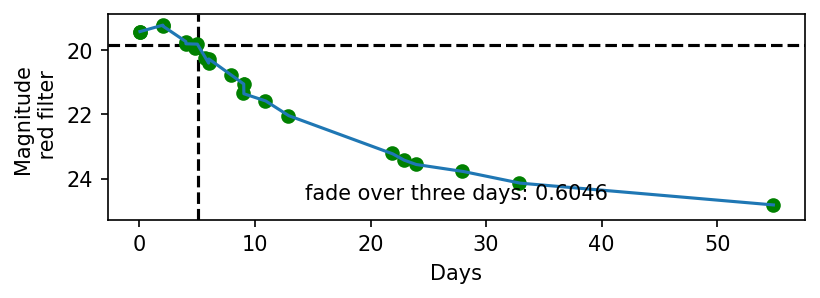

In [120]:
# red filter for transient 3

plotname = aci_detections

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20acigmel')



# green filter for transient 3
# This is the code for the second plot



red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [121]:
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")

non_detection = ND_4
non_detection

plotname = ET_4

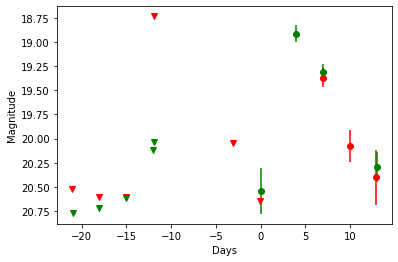

In [123]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag: 19.36875
3 days after minmag: 9.937754600316111
magnitude after 3 days: 20.0745950929308
fade after 3 days: 0.7058
minmag: 18.915483
3 days after minmag: 6.904594900093798
magnitude after 3 days: 19.306735732619025
fade after 3 days: 0.3913


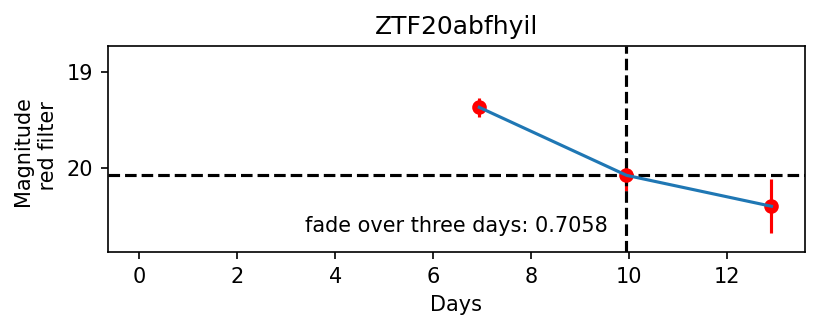

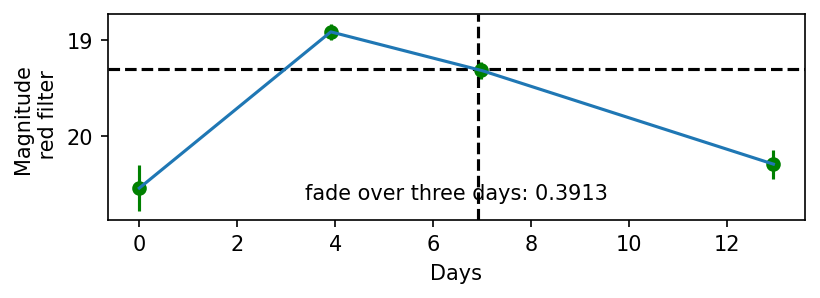

In [125]:
# red filter for transient 4

plotname = ET_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

ax1.axhline(float(threedaymag), c='black', ls='--')
ax1.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abfhyil')



# green filter for transient 4
# This is the code for the second plot



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)

mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)


# want to find the x value of 3 days after minmag, then find y 
minmag = np.min(y_vals)
minmag_index = int(np.argwhere(y_vals == minmag))
tdm_time = mintime + 3


print(f"minmag: {np.min(y_vals)}")
print(f"3 days after minmag: {tdm_time}")

# we want the y value at a specific point, that point being the magnitude at tdm_time

threedaymag = find_tdm(x_interp, y_interp, tdm_time)
print(f'magnitude after 3 days: {threedaymag}')

# find how many mags it fades after 3 days
fade = threedaymag - minmag
fade = round(fade, 4)
print(f'fade after 3 days: {fade}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

ax2.axhline(float(threedaymag), c='black', ls='--')
ax2.axvline(float(tdm_time), c='black', ls='--')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'fade over three days: {fade}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()